## Linear Regression

In [1]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
m=100
X = 2*np.random.rand(m,1)
y = 4 + 3 * X + np.random.randn(m, 1)


In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size =15)
plt.rc('axes', labelsize= 15)
plt.rc('legend', fontsize= 15)
plt.rc('xtick', labelsize= 15)
plt.rc('ytick', labelsize= 15)

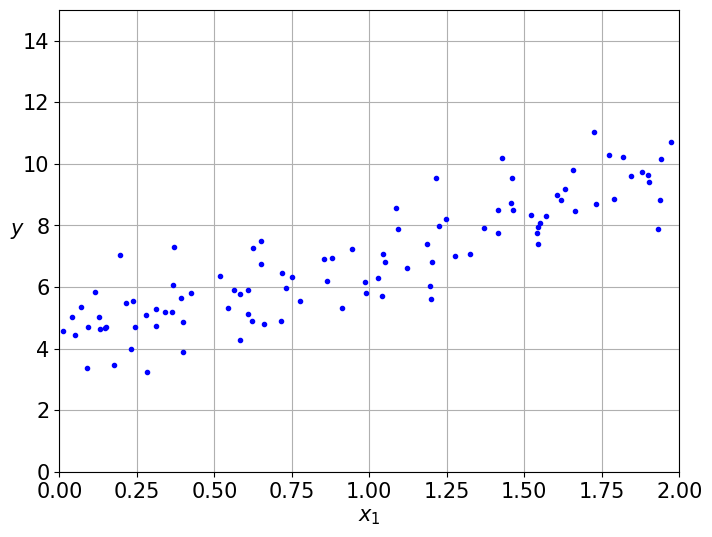

In [3]:
plt.figure(figsize=(8,6))
plt.plot(X,y ,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.show()

In [4]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)  
best_theta = np.linalg.inv(X_b.T@X_b)@X_b.T@y
print(best_theta)

[[4.21509616]
 [2.77011339]]


In [5]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict =X_new_b@best_theta

y_predict

array([[4.21509616],
       [9.75532293]])

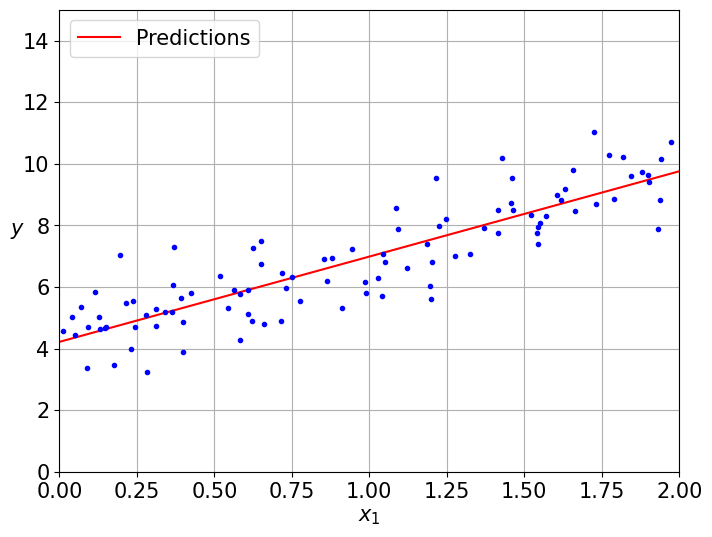

In [6]:
plt.figure(figsize=(8,6))
plt.plot(X_new, y_predict, 'r-', label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc="upper left")

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_predict = lin_reg.predict(X_new)
lin_predict

array([[4.21509616],
       [9.75532293]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [9]:
residuals ## the lower the better

array([80.6584564])

In [10]:
rank ## number of independent features

np.int32(2)

## Gradient Descent


In [25]:
eta = 0.03  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [26]:
theta

array([[4.21507295],
       [2.77013388]])

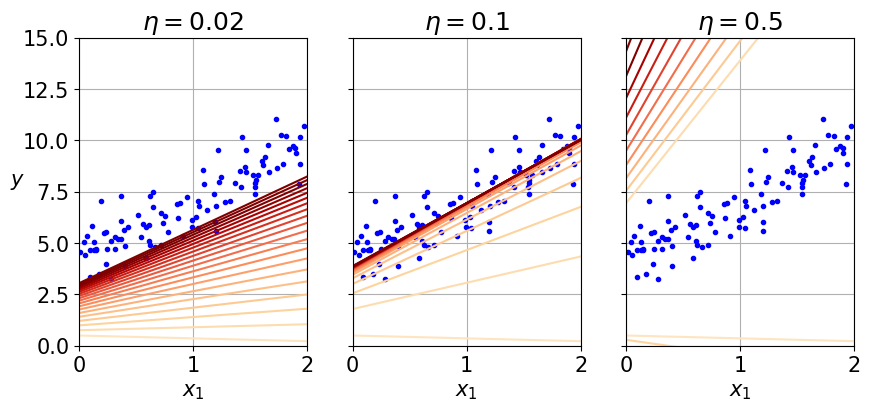

In [27]:
# extra code – generates and saves Figure 4–8

import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

finding best learning rate for SGD using GridSearchCV

In [28]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'eta0': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]}
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3)
grid_search = GridSearchCV(sgd_reg, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X, y.ravel())
grid_search.best_params_

{'eta0': 0.03}